# Capítulo 5 - Sequências Input/Output

Neste capítulo, discuriremos mais sobre o módulo `Bio.SeqIO`, cjo teve uma breve introdução no Capítulo 2 (https://github.com/GTL98/biopython_br/tree/main/Cap%202%20-%20O%20que%20podemos%20fazer%20com%20o%20Biopython) e usamos algumas de suas funções no Capítulo 4 (https://github.com/GTL98/biopython_br/tree/main/Cap%204%20-%20Objetos%20de%20anota%C3%A7%C3%A3o%20de%20sequ%C3%AAncia). Esse módulo fornece uma interface simples para trabalhar com variados formatos de arquivos de sequência em um caminho uniforme. Para saber mais, acesse o link https://biopython.org/wiki/SeqIO e a documentação online https://biopython.org/docs/1.79/api/Bio.SeqIO.html:

In [1]:
from Bio import SeqIO
help(SeqIO)

Help on package Bio.SeqIO in Bio:

NAME
    Bio.SeqIO - Sequence input/output as SeqRecord objects.

DESCRIPTION
    Bio.SeqIO is also documented at SeqIO_ and by a whole chapter in our tutorial:
    
      - `HTML Tutorial`_
      - `PDF Tutorial`_
    
    .. _SeqIO: http://biopython.org/wiki/SeqIO
    .. _`HTML Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.html
    .. _`PDF Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.pdf
    
    Input
    -----
    The main function is Bio.SeqIO.parse(...) which takes an input file handle
    (or in recent versions of Biopython alternatively a filename as a string),
    and format string.  This returns an iterator giving SeqRecord objects:
    
    >>> from Bio import SeqIO
    >>> for record in SeqIO.parse("Fasta/f002", "fasta"):
    ...     print("%s %i" % (record.id, len(record)))
    gi|1348912|gb|G26680|G26680 633
    gi|1348917|gb|G26685|G26685 413
    gi|1592936|gb|G29385|G29385 471
    
    Note that the parse(

O "problma" é que você tem que trabalhar com objetos **SeqRecords** (visto no Capítulo 4: https://github.com/GTL98/biopython_br/tree/main/Cap%204%20-%20Objetos%20de%20anota%C3%A7%C3%A3o%20de%20sequ%C3%AAncia) que contêm o objeto **Seq** (visto no Capítulo 3: https://github.com/GTL98/biopython_br/tree/main/Cap%203%20-%20Objetos%20de%20Sequ%C3%AAncia) mais as anotações como a identificação e descrição. Observe quando estamos trabalhando com grandes arquivos FASTA ou FASTQ, a sobrecarga que trabalhar com todos esses objetos deixará o script lento. Nesse caso, considere usar os analisadores **SimpleFastaParser** e **FastqGeneralIterator** que retornarão uma tupla de strings para cada registro (ver a **Seção 5.6**).

## 5.1 Analisar ou ler as sequências

A função **parse** do módulo `Bio.SeqIO` é usada para ler uma sequência em objetos **SeqRecord**. Essa função necessita de dois argumentos:
1. O primeiro argumento é um *identificador* para ler os dados ou um nome de arquivo. Um identificador típico abre o arquivo para leitura, mas pode ser a saída de um programa de linha de comando, ou um conjunto de dados baixados da internet (ver a **Seção 5.3**). Veja a **Seção 24.1** para mais informações sobre os identificadores (Capítulo 24: ***link do capítulo 24***).

2. O segundo argumento é uma string de caractéres minúsculos para especificar o formato de arquivo. Para saber todos os formatos suportados, acesse: https://biopython.org/wiki/SeqIO.

A função **parse** retorna um *iterador* que contém objetos **SeqRecord**. Iteradores são usados nos loops (mostrados ao decorrer deste capítulo).

Muitas vezes você encontrará arquivos com um único registro. Para esta situação, use a função **read** do módulo `Bio.SeqIO` que possui os mesmos argumentos. Use essa função desde que haja somente um registro no arquivo, caso contrário, será retornado um erro.

### 5.1.1 Lendo os arquivos de sequência

De modo geral, a função **parse** é usada para ler os objetos **SeqRecord** em um loop como o seguinte:

In [2]:
from Bio import SeqIO
for registro_seq in SeqIO.parse('ls_orchid.fasta', 'fasta'):
    print(registro_seq.id)
    print(repr(registro_seq.seq))
    print(len(registro_seq))

gi|2765658|emb|Z78533.1|CIZ78533
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740
gi|2765657|emb|Z78532.1|CCZ78532
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC')
753
gi|2765656|emb|Z78531.1|CFZ78531
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')
748
gi|2765655|emb|Z78530.1|CMZ78530
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT')
744
gi|2765654|emb|Z78529.1|CLZ78529
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA')
733
gi|2765652|emb|Z78527.1|CYZ78527
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC')
718
gi|2765651|emb|Z78526.1|CGZ78526
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT')
730
gi|2765650|emb|Z78525.1|CAZ78525
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA')
704
gi|2765649|emb|Z78524.1|CFZ78524
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC')
740
gi|2765648|emb|Z78523.1|CHZ78523
Seq('CGTAACCAGGTTTCCGT

O exemplo acima é o mesmo apresentado na **Seção 2.4** do Capítulo 2 (https://github.com/GTL98/biopython_br/tree/main/Cap%202%20-%20O%20que%20podemos%20fazer%20com%20o%20Biopython), onde carregamos as sequências de DNA no formato FASTA. Se você quiser carregar um arquivo no formato GenBank, basta mudar a extensão do arquivo e o segundo parâmetro:

In [3]:
from Bio import SeqIO
for registro_seq in SeqIO.parse('ls_orchid.gbk', 'genbank'):
    print(registro_seq.id)
    print(repr(registro_seq.seq))
    print(len(registro_seq))

Z78533.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740
Z78532.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC')
753
Z78531.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')
748
Z78530.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT')
744
Z78529.1
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA')
733
Z78527.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC')
718
Z78526.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT')
730
Z78525.1
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA')
704
Z78524.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC')
740
Z78523.1
Seq('CGTAACCAGGTTTCCGTAGGTGAACCTGCGGCAGGATCATTGTTGAGACAGCAG...AAG')
709
Z78522.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...GAG')
700
Z78521.1
Seq('GTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAGAATATATGATCGAGT...ACC')
726
Z78520.1
Seq('CGTAACAAGGTTTC

De modo silimar, se você quiser ler um outro formato de arquivo, assumindo que seja suportado pela função, basta mudar o segundo argumento, por exemplo: 'swiss' para arquivos SwissProt ou 'embl' para arquivos de texto EMBL. Na wiki do Biopython (https://biopython.org/wiki/SeqIO) há uma lista completa com os formatos de arquivos suportados, bem como a documentação *built in* (https://biopython.org/docs/1.79/api/Bio.SeqIO.html).

Outra maneira de usar os iteradores em Python é com *list comprehension*. Por exemplo, se você quiser extrair uma lista de identificadores de um arquivo, você pode facilmente fazer isso com *list comprehension*:

In [4]:
from Bio import SeqIO
identificadores = [registro_seq.id for registro_seq in SeqIO.parse('ls_orchid.gbk', 'genbank')]
identificadores

['Z78533.1',
 'Z78532.1',
 'Z78531.1',
 'Z78530.1',
 'Z78529.1',
 'Z78527.1',
 'Z78526.1',
 'Z78525.1',
 'Z78524.1',
 'Z78523.1',
 'Z78522.1',
 'Z78521.1',
 'Z78520.1',
 'Z78519.1',
 'Z78518.1',
 'Z78517.1',
 'Z78516.1',
 'Z78515.1',
 'Z78514.1',
 'Z78513.1',
 'Z78512.1',
 'Z78511.1',
 'Z78510.1',
 'Z78509.1',
 'Z78508.1',
 'Z78507.1',
 'Z78506.1',
 'Z78505.1',
 'Z78504.1',
 'Z78503.1',
 'Z78502.1',
 'Z78501.1',
 'Z78500.1',
 'Z78499.1',
 'Z78498.1',
 'Z78497.1',
 'Z78496.1',
 'Z78495.1',
 'Z78494.1',
 'Z78493.1',
 'Z78492.1',
 'Z78491.1',
 'Z78490.1',
 'Z78489.1',
 'Z78488.1',
 'Z78487.1',
 'Z78486.1',
 'Z78485.1',
 'Z78484.1',
 'Z78483.1',
 'Z78482.1',
 'Z78481.1',
 'Z78480.1',
 'Z78479.1',
 'Z78478.1',
 'Z78477.1',
 'Z78476.1',
 'Z78475.1',
 'Z78474.1',
 'Z78473.1',
 'Z78472.1',
 'Z78471.1',
 'Z78470.1',
 'Z78469.1',
 'Z78468.1',
 'Z78467.1',
 'Z78466.1',
 'Z78465.1',
 'Z78464.1',
 'Z78463.1',
 'Z78462.1',
 'Z78461.1',
 'Z78460.1',
 'Z78459.1',
 'Z78458.1',
 'Z78457.1',
 'Z78456.1',

Há mais exemplos usando a função **parse** com *list comprehension* na **Seção 20.2**, como pltar o tamanho das sequências ou o conteúdo GC. (Capítulo 20: ***link do capítulo 20***).

### 5.1.2 Iterando sobre os registros em um arquivo de sequência

Nos exemplos acima, nós usamos um loop para iterar sobre os registros um por um. Você pode usar o loop com todos os objetos Python (incluindo listas, tuplas e strings) que suporte iteração.

O objeto retornado pelo `Bio.SeqIO` é atualmente um interador que retorna objetos **SeqRecord**. Você consegue ver cada registro, mas somente uma vez. O ponto positivo disso é qe você salva grandes quantidades de memória quando trabalha com arquivos grandes.

Ao invés de usar um loop, você pode usar a função **next** em um iterador para percorrer as entradas desse modo:

In [5]:
from Bio import SeqIO
iterador_registro = SeqIO.parse('ls_orchid.fasta', 'fasta')

primeiro_registro = next(iterador_registro)
print(primeiro_registro.id)
print(primeiro_registro.description)

segundo_registro = next(iterador_registro)
print(segundo_registro.id)
print(segundo_registro.description)

gi|2765658|emb|Z78533.1|CIZ78533
gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
gi|2765657|emb|Z78532.1|CCZ78532
gi|2765657|emb|Z78532.1|CCZ78532 C.californicum 5.8S rRNA gene and ITS1 and ITS2 DNA


Note que se você usar a função **next** e não obtiver mais resultados, uma exceção é retornada (**StopIteration**).

Mais um caso especial a considerar é quando o seu arquivo possui vários registros, mas você quer somente o primeiro. Nessa situação, o código é bem conciso:

In [6]:
from Bio import SeqIO
primeiro_registro = next(SeqIO.parse('ls_orchid.gbk', 'genbank'))
primeiro_registro

SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC'), id='Z78533.1', name='Z78533', description='C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[])

Um pequeno aviso. Usar a função **next** como mostrado, ignorará reistros adicionais do arquivo. Se o seu arquivo possuir somente um registro, como arquivos GenBank com um único cromossomo, é aconselhável que seja usada a função **read**. Isso verificará se não há registros extras inesperados presentes.

### 5.1.3 Obtendo uma lista de registros em um arquivo de sequência

Na seção anterior, nós falamos sobre o fato da função **parse** retornar um iterador **SeqRecord** que mostra os registros um a um. Muitas vezes, você precisa ser capaz de acessar os registros em qualquer ordem. Uma lista Python é perfeita para isso. Pode os transformar um registro iterado em ma lista de objetos **SeqRecord** usando a função **list** nativa do Python:

In [7]:
from Bio import SeqIO
registros = list(SeqIO.parse('ls_orchid.gbk', 'genbank'))

print(f'Encontrado {len(registros)} registros')

print('Último registro:')
ultimo_registro = registros[-1]  # usamos alguns truques de lista
print(repr(ultimo_registro.seq))
print(len(ultimo_registro))

print('Primeiro registro:')
primeiro_registro = registros[0]  # lembre-se que o Python começa a contar do zero
print(repr(primeiro_registro.seq))
print(len(primeiro_registro))

Encontrado 94 registros
Último registro:
Seq('CATTGTTGAGATCACATAATAATTGATCGAGTTAATCTGGAGGATCTGTTTACT...GCC')
592
Primeiro registro:
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740


É óbvio que você pode continuar usando um loop para os objetos **SeqRecord**, mas usar uma lista é mais flexível do que um iterador (por exemplo, você pode determinar o número de registros o comprimento da lista), mas você precisa de mais memória pois manterá todos os registros na memória de uma só vez.

### 5.1.4 Extraindo dados

O objeto **SeqRecord** e suas estruturas de anotação foram descritas em detalhes no Capítulo 4 (https://github.com/GTL98/biopython_br/tree/main/Cap%204%20-%20Objetos%20de%20anota%C3%A7%C3%A3o%20de%20sequ%C3%AAncia). Como um exemplo de como as anotações são armazenadas, camos olhar a saída da análise do primeiro registor de um arquivo GenBank:

In [8]:
from Bio import SeqIO
iterador_registro = SeqIO.parse('ls_orchid.gbk', 'genbank')
primeiro_registro = next(iterador_registro)
print(primeiro_registro)

ID: Z78533.1
Name: Z78533
Description: C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
Number of features: 5
/molecule_type=DNA
/topology=linear
/data_file_division=PLN
/date=30-NOV-2006
/accessions=['Z78533']
/sequence_version=1
/gi=2765658
/keywords=['5.8S ribosomal RNA', '5.8S rRNA gene', 'internal transcribed spacer', 'ITS1', 'ITS2']
/source=Cypripedium irapeanum
/organism=Cypripedium irapeanum
/taxonomy=['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Asparagales', 'Orchidaceae', 'Cypripedioideae', 'Cypripedium']
/references=[Reference(title='Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title='Direct Submission', ...)]
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')


O código acima retorna um sumário capaz de um humano ler e compreender o seu conteúdo. Como exemplo, vamos chamar o atributo **annotations**, que é um dicionário Python. As informações do dicionário das anotações são as mesmas que as mostradas acima. Você pode mostrá-las diretamente:

In [9]:
print(primeiro_registro.annotations)

{'molecule_type': 'DNA', 'topology': 'linear', 'data_file_division': 'PLN', 'date': '30-NOV-2006', 'accessions': ['Z78533'], 'sequence_version': 1, 'gi': '2765658', 'keywords': ['5.8S ribosomal RNA', '5.8S rRNA gene', 'internal transcribed spacer', 'ITS1', 'ITS2'], 'source': 'Cypripedium irapeanum', 'organism': 'Cypripedium irapeanum', 'taxonomy': ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Asparagales', 'Orchidaceae', 'Cypripedioideae', 'Cypripedium'], 'references': [Reference(title='Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title='Direct Submission', ...)]}


Como qualquer dicionário Python, você pode selecionar somente as chaves:

In [10]:
print(primeiro_registro.annotations.keys())

dict_keys(['molecule_type', 'topology', 'data_file_division', 'date', 'accessions', 'sequence_version', 'gi', 'keywords', 'source', 'organism', 'taxonomy', 'references'])


Ou os valores:

In [11]:
print(primeiro_registro.annotations.values())

dict_values(['DNA', 'linear', 'PLN', '30-NOV-2006', ['Z78533'], 1, '2765658', ['5.8S ribosomal RNA', '5.8S rRNA gene', 'internal transcribed spacer', 'ITS1', 'ITS2'], 'Cypripedium irapeanum', 'Cypripedium irapeanum', ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Asparagales', 'Orchidaceae', 'Cypripedioideae', 'Cypripedium'], [Reference(title='Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title='Direct Submission', ...)]])


De modo geral, os valores de **annotations** são strings ou uma lista de strings. Um caso especial ocorre quando uma referência no arquivo é armazenada em algum objeto de referência.

Suponha que você queira extrair uma lista das espécies presentes no arquivo *ls_orchid.gbk*. A informação que você deseja, *Cypripedium irapeanum*, está armazenada nas chaves **source** e **organism** do dicionário **annotations**:

In [12]:
print(primeiro_registro.annotations['source'])

Cypripedium irapeanum


Ou:

In [13]:
print(primeiro_registro.annotations['organism'])

Cypripedium irapeanum


Geralmente, a chave **organism** é usado para o nome científico (em Latim, e.g. *Aedes aegypti*) enquanto a chave **source** é usado para o nome comum (e.g. Mosquito-da-dengue). Nesse exemplo acima, ambas as chaves possuem o mesmo valor.

Agora, vamos passar por todos os registros, construindo uma lista das espécies de cada sequência de orquídea:

In [14]:
from Bio import SeqIO
todas_especies = []
for registro_seq in SeqIO.parse('ls_orchid.gbk', 'genbank'):
    todas_especies.append(registro_seq.annotations['organism'])
print(todas_especies)

['Cypripedium irapeanum', 'Cypripedium californicum', 'Cypripedium fasciculatum', 'Cypripedium margaritaceum', 'Cypripedium lichiangense', 'Cypripedium yatabeanum', 'Cypripedium guttatum', 'Cypripedium acaule', 'Cypripedium formosanum', 'Cypripedium himalaicum', 'Cypripedium macranthon', 'Cypripedium calceolus', 'Cypripedium segawai', 'Cypripedium parviflorum var. pubescens', 'Cypripedium reginae', 'Cypripedium flavum', 'Cypripedium passerinum', 'Mexipedium xerophyticum', 'Phragmipedium schlimii', 'Phragmipedium besseae', 'Phragmipedium wallisii', 'Phragmipedium exstaminodium', 'Phragmipedium caricinum', 'Phragmipedium pearcei', 'Phragmipedium longifolium', 'Phragmipedium lindenii', 'Phragmipedium lindleyanum', 'Phragmipedium sargentianum', 'Phragmipedium kaiteurum', 'Phragmipedium czerwiakowianum', 'Phragmipedium boissierianum', 'Phragmipedium caudatum', 'Phragmipedium warszewiczianum', 'Paphiopedilum micranthum', 'Paphiopedilum malipoense', 'Paphiopedilum delenatii', 'Paphiopedilum a

Outra forma de escrever o mesmo código é usando a *list comprehension*:

In [15]:
from Bio import SeqIO
todas_especies = [
    registro_seq.annotations['organism']
    for registro_seq in SeqIO.parse('ls_orchid.gbk', 'genbank')
]
print(todas_especies)

['Cypripedium irapeanum', 'Cypripedium californicum', 'Cypripedium fasciculatum', 'Cypripedium margaritaceum', 'Cypripedium lichiangense', 'Cypripedium yatabeanum', 'Cypripedium guttatum', 'Cypripedium acaule', 'Cypripedium formosanum', 'Cypripedium himalaicum', 'Cypripedium macranthon', 'Cypripedium calceolus', 'Cypripedium segawai', 'Cypripedium parviflorum var. pubescens', 'Cypripedium reginae', 'Cypripedium flavum', 'Cypripedium passerinum', 'Mexipedium xerophyticum', 'Phragmipedium schlimii', 'Phragmipedium besseae', 'Phragmipedium wallisii', 'Phragmipedium exstaminodium', 'Phragmipedium caricinum', 'Phragmipedium pearcei', 'Phragmipedium longifolium', 'Phragmipedium lindenii', 'Phragmipedium lindleyanum', 'Phragmipedium sargentianum', 'Phragmipedium kaiteurum', 'Phragmipedium czerwiakowianum', 'Phragmipedium boissierianum', 'Phragmipedium caudatum', 'Phragmipedium warszewiczianum', 'Paphiopedilum micranthum', 'Paphiopedilum malipoense', 'Paphiopedilum delenatii', 'Paphiopedilum a

Beleza! O resultado obtido é rápido porque as anotações em arquivos GenBank estão dispóstos de forma padronizada.

Agora, suponha que você queira extrair a lista das espécies de um arquivo FASTA, ao invés de um arquivo GenBank. A má notícia é que você deverá escrever mais um pouco de código para extrair a informação desejada da linha **description** do registro (isso se a informação estiver na primeira posição no arquivo!). O nosso exemplo começa assim:

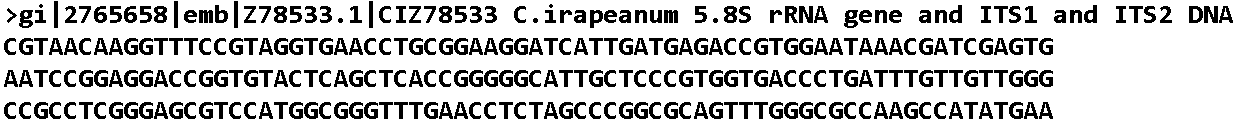**...**

Vamos ver como é disposta a infomação presente em **description**:

In [16]:
from Bio import SeqIO
registro = SeqIO.parse('ls_orchid.fasta', 'fasta')
primeiro_registro = next(registro)
print(primeiro_registro.description)

gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA


Se você verificar manualmente esse arquivo, verá que o nome da espécie está na segunda posição quando separado nos espaços em branco. Isso significa que deveremos quebrar essa informação do registro nos espaços em branco, sendo a posição 1 que essa informação ocupa:

In [17]:
from Bio import SeqIO
todas_especies = []
for registro_seq in SeqIO.parse('ls_orchid.fasta', 'fasta'):
    todas_especies.append(registro_seq.description.split()[1])
print(todas_especies)

['C.irapeanum', 'C.californicum', 'C.fasciculatum', 'C.margaritaceum', 'C.lichiangense', 'C.yatabeanum', 'C.guttatum', 'C.acaule', 'C.formosanum', 'C.himalaicum', 'C.macranthum', 'C.calceolus', 'C.segawai', 'C.pubescens', 'C.reginae', 'C.flavum', 'C.passerinum', 'M.xerophyticum', 'P.schlimii', 'P.besseae', 'P.wallisii', 'P.exstaminodium', 'P.caricinum', 'P.pearcei', 'P.longifolium', 'P.lindenii', 'P.lindleyanum', 'P.sargentianum', 'P.kaiteurum', 'P.czerwiakowianum', 'P.boissierianum', 'P.caudatum', 'P.warszewiczianum', 'P.micranthum', 'P.malipoense', 'P.delenatii', 'P.armeniacum', 'P.emersonii', 'P.niveum', 'P.godefroyae', 'P.bellatulum', 'P.concolor', 'P.fairrieanum', 'P.druryi', 'P.tigrinum', 'P.hirsutissimum', 'P.barbigerum', 'P.henryanum', 'P.charlesworthii', 'P.villosum', 'P.exul', 'P.insigne', 'P.gratrixianum', 'P.primulinum', 'P.victoria', 'P.victoria', 'P.glaucophyllum', 'P.supardii', 'P.kolopakingii', 'P.sanderianum', 'P.lowii', 'P.dianthum', 'P.parishii', 'P.haynaldianum', 'P

Também é possível usar a *list comprehensions*:

In [18]:
from Bio import SeqIO
todas_especies =[
    registro_seq.description.split()[1]
    for registro_seq in SeqIO.parse('ls_orchid.fasta', 'fasta')
]
print(todas_especies)

['C.irapeanum', 'C.californicum', 'C.fasciculatum', 'C.margaritaceum', 'C.lichiangense', 'C.yatabeanum', 'C.guttatum', 'C.acaule', 'C.formosanum', 'C.himalaicum', 'C.macranthum', 'C.calceolus', 'C.segawai', 'C.pubescens', 'C.reginae', 'C.flavum', 'C.passerinum', 'M.xerophyticum', 'P.schlimii', 'P.besseae', 'P.wallisii', 'P.exstaminodium', 'P.caricinum', 'P.pearcei', 'P.longifolium', 'P.lindenii', 'P.lindleyanum', 'P.sargentianum', 'P.kaiteurum', 'P.czerwiakowianum', 'P.boissierianum', 'P.caudatum', 'P.warszewiczianum', 'P.micranthum', 'P.malipoense', 'P.delenatii', 'P.armeniacum', 'P.emersonii', 'P.niveum', 'P.godefroyae', 'P.bellatulum', 'P.concolor', 'P.fairrieanum', 'P.druryi', 'P.tigrinum', 'P.hirsutissimum', 'P.barbigerum', 'P.henryanum', 'P.charlesworthii', 'P.villosum', 'P.exul', 'P.insigne', 'P.gratrixianum', 'P.primulinum', 'P.victoria', 'P.victoria', 'P.glaucophyllum', 'P.supardii', 'P.kolopakingii', 'P.sanderianum', 'P.lowii', 'P.dianthum', 'P.parishii', 'P.haynaldianum', 'P

De modo geral, extrair informações da linha de descrição de um arquivo FASTA não é uma tarefa muito legal. Você pode conseguir suas sequências de maneira bem anotadas em arquivos GenBank e EMBL, uma vez que esse tipo de anotação de informação é muito mais fácil de trabalhar.

### 5.1.5 Modificando os dados

Na seção anterior, vimos como extrair os dados de um **SeqRecord**. Outra tarefa comum é alterar esses dados. Os atributos do **SeqRecord** podem ser modificados diretamente:

In [19]:
from Bio import SeqIO
iterador_registro = SeqIO.parse('ls_orchid.fasta', 'fasta')
primeiro_registro = next(iterador_registro)
primeiro_registro.id

'gi|2765658|emb|Z78533.1|CIZ78533'

In [20]:
primeiro_registro.id = 'novo_id'
primeiro_registro.id

'novo_id'

Observe que se você quiser mudar a forma de como o arquivo FASTA é gerado quando gravado em um arquivo (ver a **Seção 5.5**), você deve modificar os atributos **id** e **description**. Para garantir o mesmo comportamento, é aconcelhável incluir o **id** seuido de um espaço em branco e depois o **description**:

In [21]:
from Bio import SeqIO
iterador_registro = SeqIO.parse('ls_orchid.fasta', 'fasta')
primeiro_registro = next(iterador_registro)
primeiro_registro.id = 'novo_id'
primeiro_registro.description = primeiro_registro.id + ' ' + 'nova descrição'
print(primeiro_registro.format('fasta')[:200])

>novo_id nova descrição
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAA
CGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGT
GACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCT


## 5.2 Analisando sequências de arquivos compactos

Na seção anterior vimos a análise dos dados de uma sequência. Em vez de usar o nome do arquivo, você pode fornecer ao `Bio.SeqIO` um identificador (ver a **Seção 24.1** para mais informações. Capítulo 24: ***link do capítulo 24***). Nessa seção usaremos identificadores para analisar sequências de arquivos compactos.

Como você viu acima, podemos usar as funções **read** ou **parse** com o nome do arquivo para, por exemplo, calcular o tamanho total das sequências no arquivo GenBank:

In [22]:
from Bio import SeqIO
print(sum(len(r) for r in SeqIO.parse('ls_orchid.gbk', 'genbank')))

67518


Aqui usamos um identificador de arquivo, com a instância **with** para fechar o identificador automaticamente quando terminar a análise:

In [23]:
from Bio import SeqIO
with open('ls_orchid.gbk') as identificador:
    print(sum(len(r) for r in SeqIO.parse(identificador, 'genbank')))

67518


Ou podemos usar ainda o modo manual de se abrir e fechar o identificador (materiais mais antigos usam essa forma de escrita):

In [24]:
from Bio import SeqIO
identificador = open('ls_orchid.gbk')
print(sum(len(r) for r in SeqIO.parse(identificador, 'genbank')))
identificador.close()

67518


Suponha que você tenha um arquivo compacto, o que fazer? Esse tipo de distibição de arquivo é muito comum em Linux. Sabendo disso, vamos usar a biblioteca `gzip` (que já vem instalada com o Python) para abrir arquivos compactos e lê-los (o arquivo está no mesmo diretório desde documento):

In [25]:
import gzip
from Bio import SeqIO
with gzip.open('ls_orchid_gzip.gbk.gz', 'rt') as identificador:
    print(sum(len(r) for r in SeqIO.parse(identificador, 'genbank')))

67518


De modo semelhante, podemos usar a biblioteca `bzip2` (já vem instalada com o Python). O arquivo para exemplo está no mesmo diretório desde documento:

In [26]:
import bz2
from Bio import SeqIO
with bz2.open('ls_orchid_bzip2.gbk.bz2', 'rt') as identificador:
    print(sum(len(r) for r in SeqIO.parse(identificador, 'genbank')))

67518


O código acima mostra uma variante do gzip (GNU Zip) chamada de BGZF (Blocked GNU Zip Format), que pode ser tratado como um arquivo gzip comum para leitura, mas possui vantagens para acesso aleatório; falaremos disso mais tarde na **Seção 5.4.4**.

## 5.3 Analisando sequência da Internet

**pag 54**